![DSA](imagens/projeto2.png)

In [286]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [287]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [288]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [289]:
# Shape
df_dsa.shape

(9700, 11)

In [290]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [291]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [292]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [293]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [294]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [295]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [296]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [297]:
df_dsa.head()
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])

C:\Users\RAFAE\AppData\Local\Temp\ipykernel_32144\1845840212.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [298]:
df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(1)

Cidade
New York City    68362.814
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

<Figure size 2000x600 with 0 Axes>

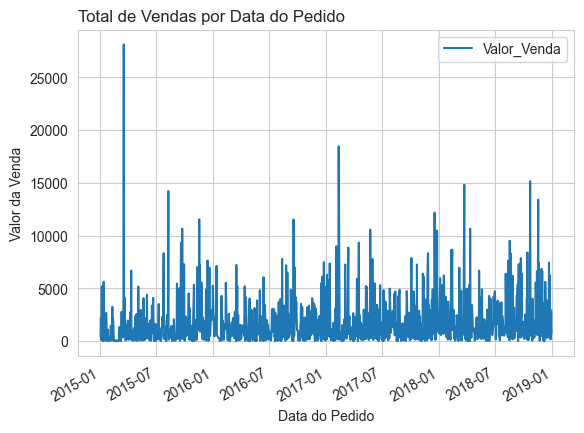

In [317]:
dados = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

plt.figure(figsize=(20,6))
dados.plot(x='Data_Pedido', y='Valor_Venda')
plt.xlabel('Data do Pedido')
plt.ylabel('Valor da Venda')
plt.title('Total de Vendas por Data do Pedido',loc='left')
plt.show()



## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

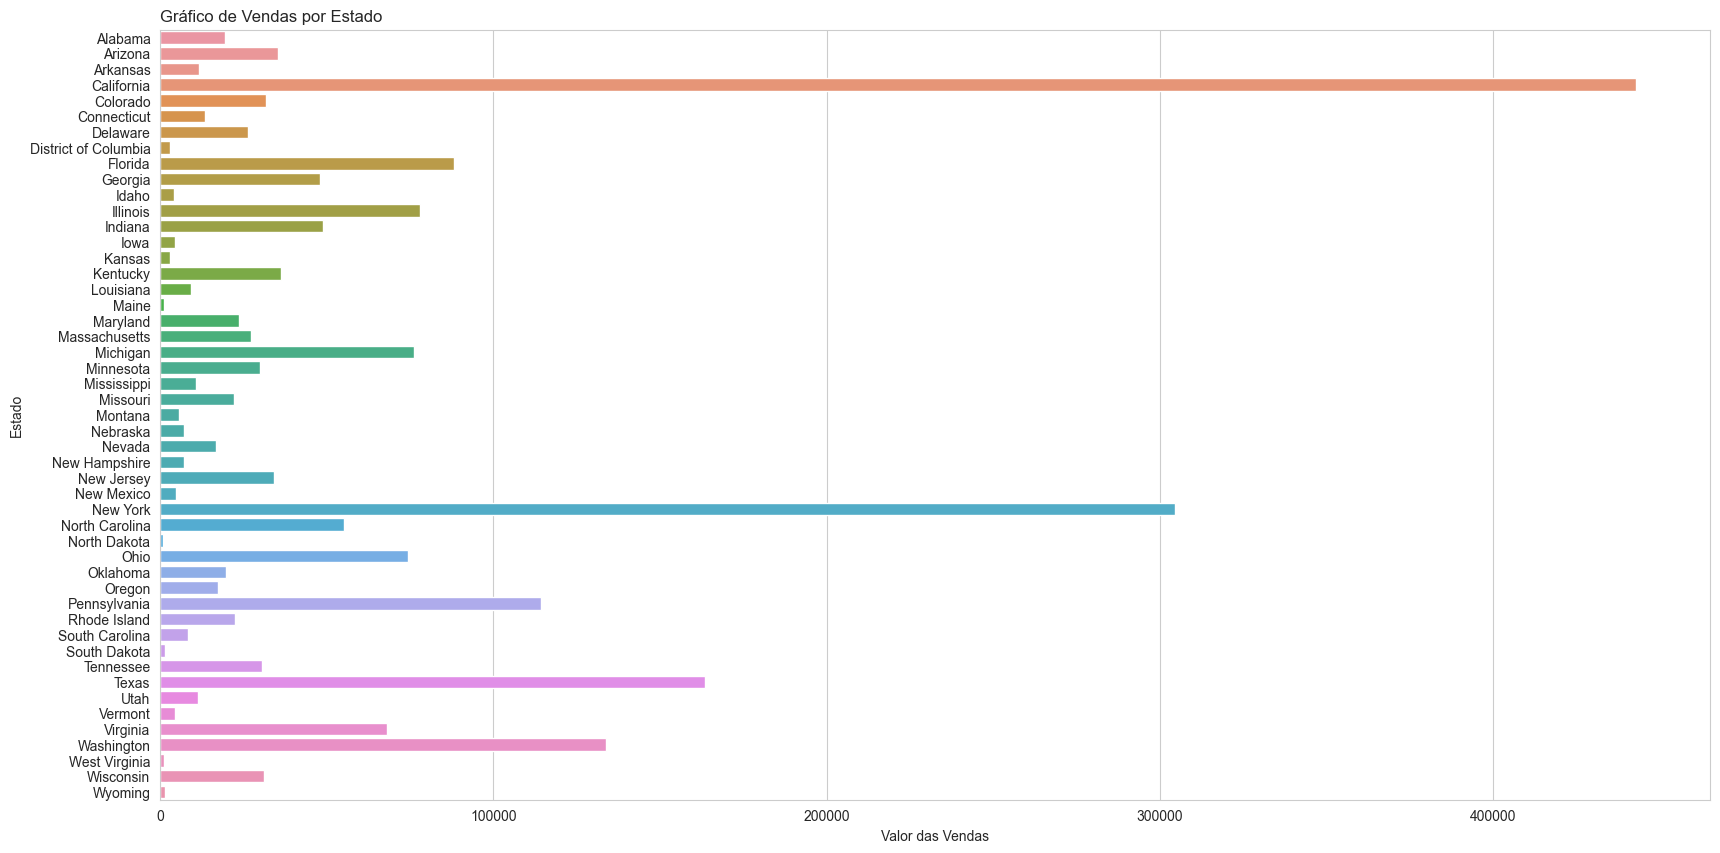

In [320]:
dados = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(data=dados, x='Valor_Venda',
                        y='Estado'
            )
plt.xlabel('Valor das Vendas')
plt.ylabel('Estado')
plt.title('Gráfico de Vendas por Estado',loc='left')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

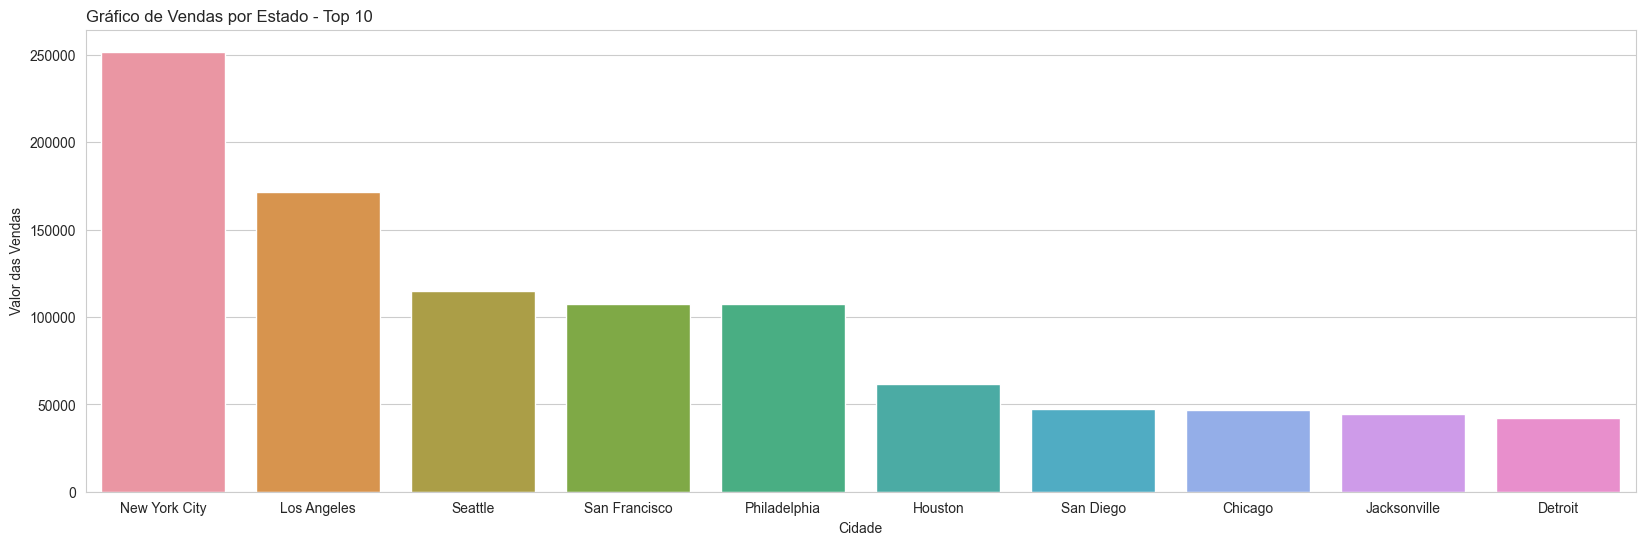

In [340]:
dados = df_dsa.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(20,6))
sns.set_palette('coolwarm')
sns.barplot(data=dados,x='Cidade',y='Valor_Venda')
plt.xlabel('Cidade')
plt.ylabel('Valor das Vendas')
plt.title('Gráfico de Vendas por Estado - Top 10',loc='left')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

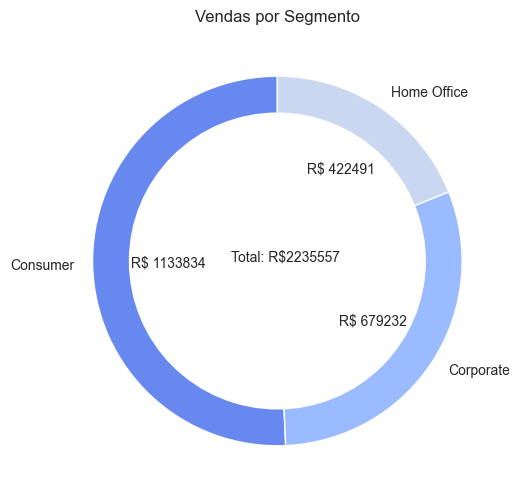

In [361]:
dados = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',ascending=False)

def autopct_format(valor):
    def format(pct):
        total = sum(valor)
        val = int(round(pct * total / 100.0))
        return ' R$ {v:d}'.format(v=val)
    return format

sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
plt.pie(dados['Valor_Venda'],
        labels=dados['Segmento'],
        autopct= autopct_format(dados['Valor_Venda']),
        startangle=90
)

#Retira o centro do circulo
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Labels
plt.annotate(text='Total:' + ' R$' + str(int(sum(dados['Valor_Venda']))), xy=(-0.25,0))
plt.title('Vendas por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

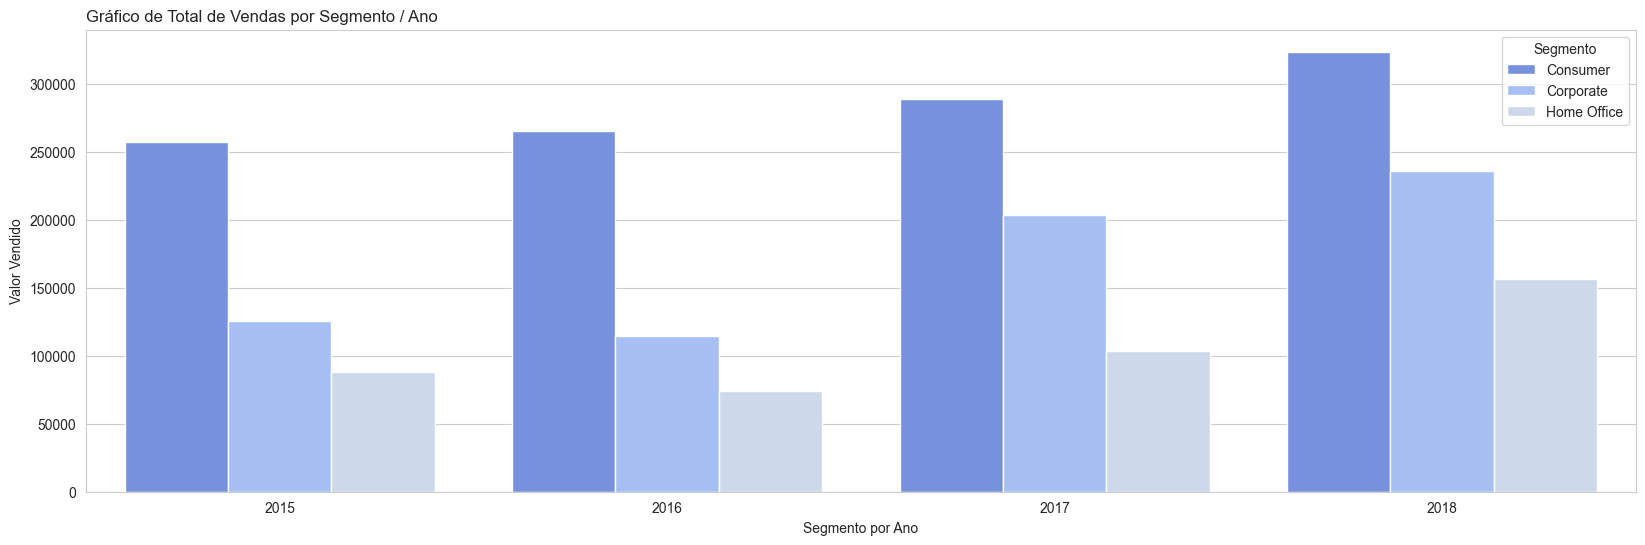

In [364]:
dados = df_dsa.groupby(['Segmento',df_dsa['Data_Pedido'].dt.year])['Valor_Venda'].sum().reset_index()

plt.figure(figsize=(20,6))
sns.barplot(x=dados['Data_Pedido'], y=dados['Valor_Venda'],hue=dados['Segmento'])
plt.xlabel('Segmento por Ano')
plt.ylabel('Valor Vendido')
plt.title('Gráfico de Total de Vendas por Segmento / Ano',loc='left')
plt.show()

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [366]:
#df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)
df_dsa['Desconto'] = df_dsa['Valor_Venda'].apply(lambda x: x > 1000)
desconto = {False: 10, True:15}
df_dsa['Desconto'] = df_dsa['Desconto'].map(desconto)
qtde = df_dsa[df_dsa['Desconto']==15]['ID_Pedido'].count()
print(f'No total de {qtde} vendas receberiam desconto de 15%')

No total de 457 vendas receberiam desconto de 15%


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [305]:
df_dsa['Valor_Venda_Novo'] = df_dsa[df_dsa['Desconto']==15]['Valor_Venda'].apply(lambda x: x - (x * .15))
df_dsa[df_dsa['Desconto']==15].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Novo
10,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,15,1450.2564
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,15,887.9355
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,15,2620.9155
35,CA-2017-117590,2017-08-12,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,15,932.9124
54,CA-2017-105816,2017-11-12,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,15,875.4575


In [367]:
df_dsa['Valor_Venda_Novo'] = df_dsa[df_dsa['Desconto']==15]['Valor_Venda'].apply(lambda x: x - (x * .15))
df_dsa[df_dsa['Desconto']==15][['Valor_Venda','Valor_Venda_Novo']].mean()

Valor_Venda         2116.807815
Valor_Venda_Novo    1799.286643
dtype: float64

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

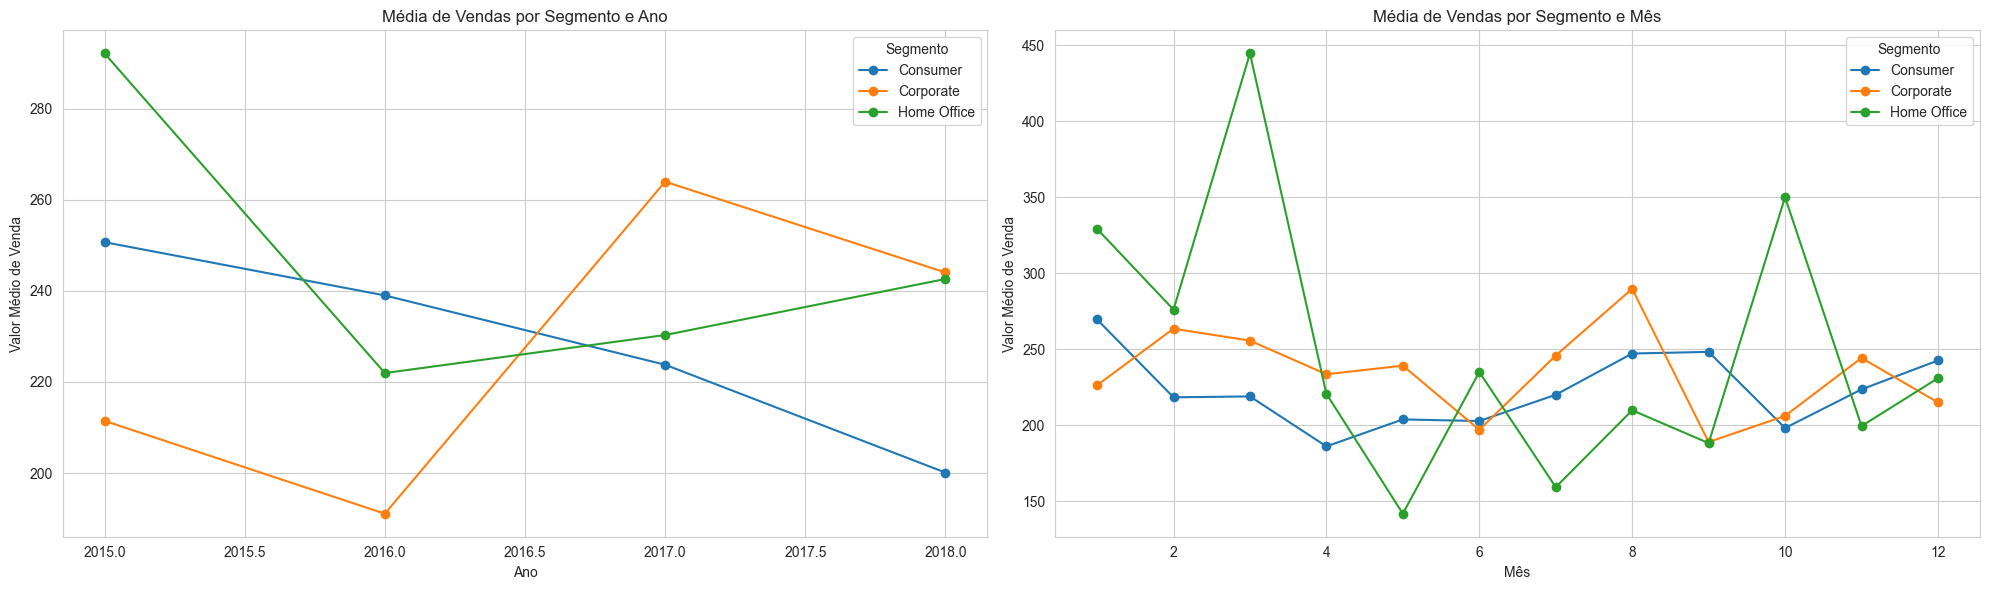

In [306]:
dados1 = df_dsa.groupby(['Segmento',df_dsa['Data_Pedido'].dt.year])['Valor_Venda'].mean().reset_index()

dados2 = df_dsa.groupby(['Segmento',df_dsa['Data_Pedido'].dt.month])['Valor_Venda'].mean().reset_index()

fig, axes = plt.subplots(1,2, figsize=(20,6))

# Plotar o gráfico de linhas para o valor médio de vendas por ano
for segmento in dados1['Segmento'].unique():
    segmento_data = dados1[dados1['Segmento'] == segmento]
    axes[0].plot(segmento_data['Data_Pedido'], segmento_data['Valor_Venda'], marker='o', label=segmento)

axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Valor Médio de Venda')
axes[0].set_title('Média de Vendas por Segmento e Ano')
axes[0].legend(title='Segmento')
axes[0].grid(True)

# Plotar o gráfico de linhas para o valor médio de vendas por mês
for segmento in dados2['Segmento'].unique():
    segmento_data = dados2[dados2['Segmento'] == segmento]
    axes[1].plot(segmento_data['Data_Pedido'], segmento_data['Valor_Venda'], marker='o', label=segmento)

axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Valor Médio de Venda')
axes[1].set_title('Média de Vendas por Segmento e Mês')
axes[1].legend(title='Segmento')
axes[1].grid(True)

# Exibir os gráficos
plt.tight_layout()
plt.show()



<Figure size 2000x600 with 0 Axes>

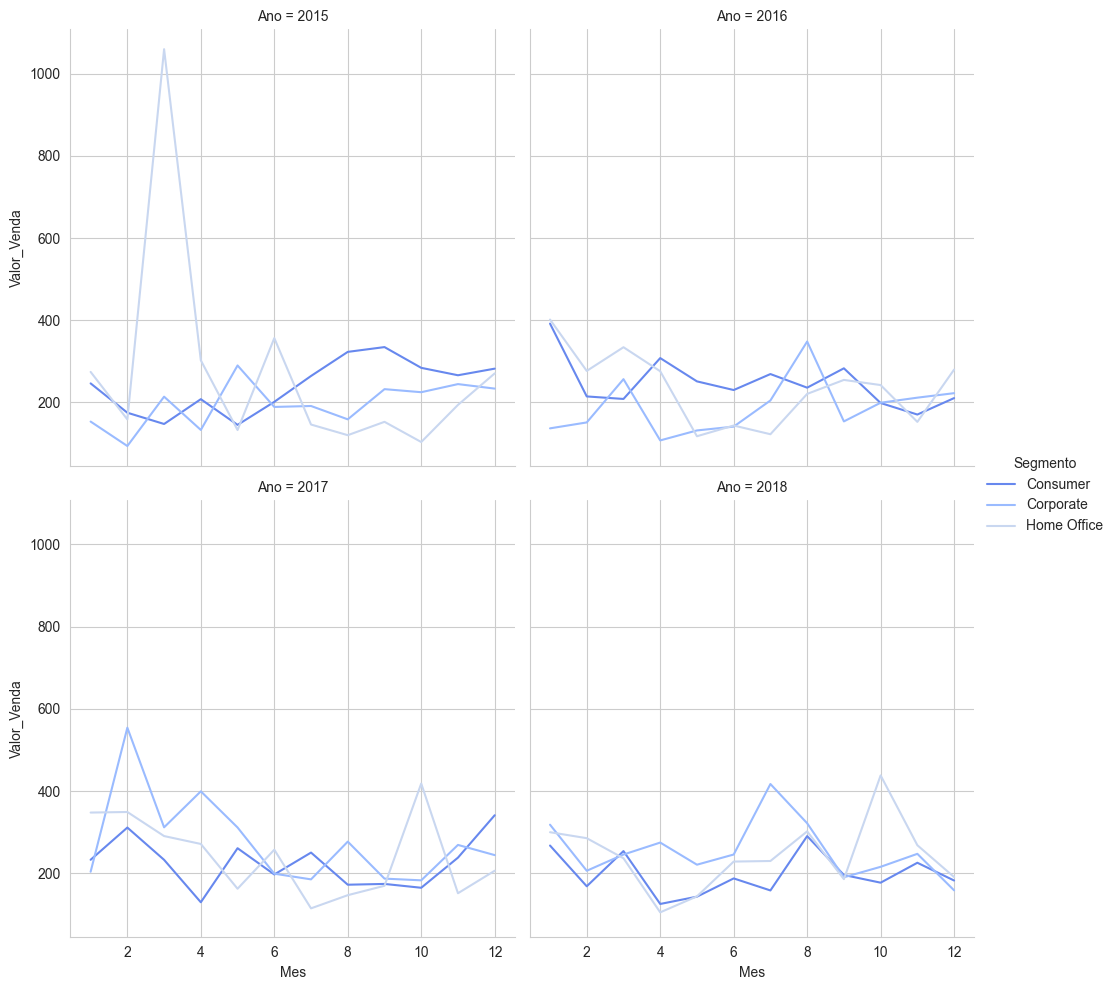

In [371]:
dadosNovo = df_dsa.groupby(['Segmento',df_dsa['Data_Pedido'].dt.year.rename('Ano'),df_dsa['Data_Pedido'].dt.month.rename('Mes')])['Valor_Venda'].mean().reset_index()

plt.figure(figsize=(20,6))
fig = sns.relplot(kind='line',
                  data=dadosNovo,
                  y=dadosNovo['Valor_Venda'],
                  x=dadosNovo['Mes'],
                  hue=dadosNovo['Segmento'],
                  col=dadosNovo['Ano'],
                  col_wrap=2
                  )
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

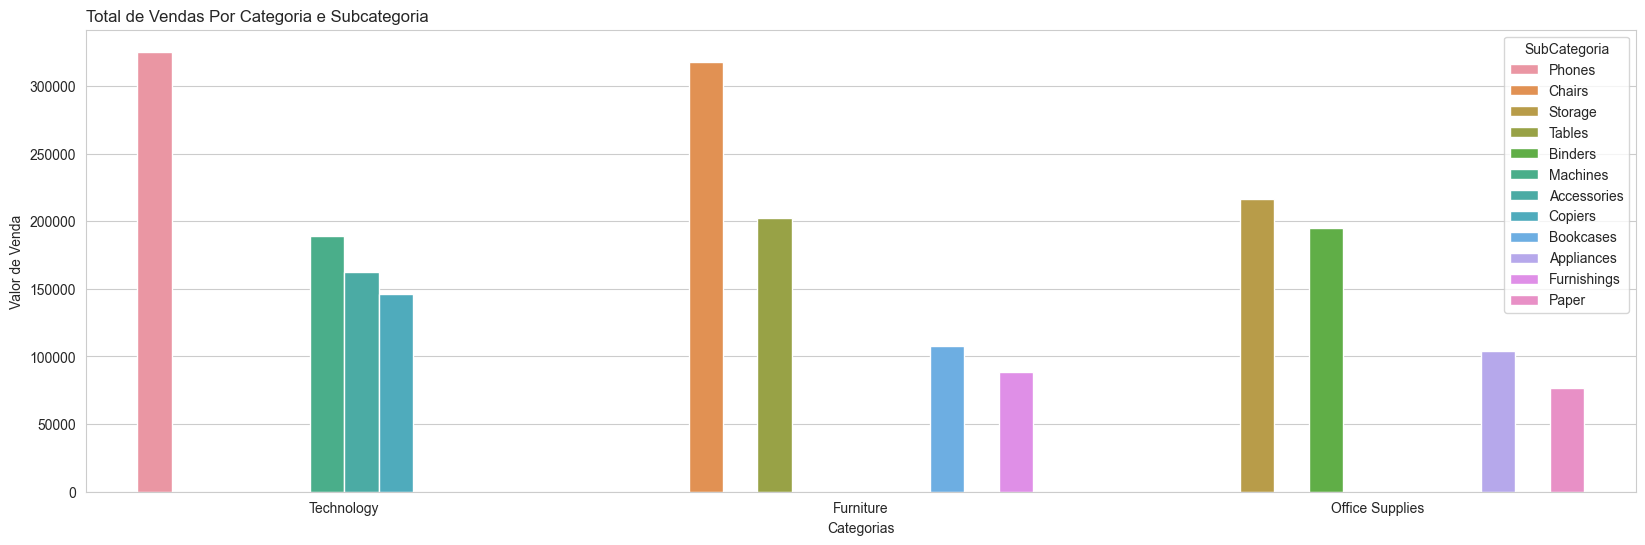

In [307]:
dados = df_dsa.groupby(['Categoria','SubCategoria'])['Valor_Venda'].sum().sort_values(ascending=False).head(12).reset_index()

plt.figure(figsize=(20,6))
sns.barplot(x=dados['Categoria'],y=dados['Valor_Venda'],hue=dados['SubCategoria'],)
plt.xlabel('Categorias')
plt.ylabel('Valor de Venda')
plt.title('Total de Vendas Por Categoria e Subcategoria',loc='left')
plt.show()

In [372]:
#Resposta do professor
#Agrupamos por categoria e subcategoria e calculamos a soma somente para variaveis numericas
df_dsa_p10 = df_dsa.groupby(['Categoria','SubCategoria']).sum(numeric_only=True).sort_values('Valor_Venda',ascending=False).head(12)

In [373]:
#Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_dsa_p10 = df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()

            Obs.: Classificar o item acima por categoria é importante para preencher o gráfico com as subcategorias para cada categoria de forma ordenada.

In [374]:
#Dataframe com categorias e subcategorias
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [375]:
#Criamos outro dataframe somente com os totais por categoria
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only=True).reset_index()

In [376]:
#Dataframe com categorias
df_dsa_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [377]:
#Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [378]:
#Lista de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

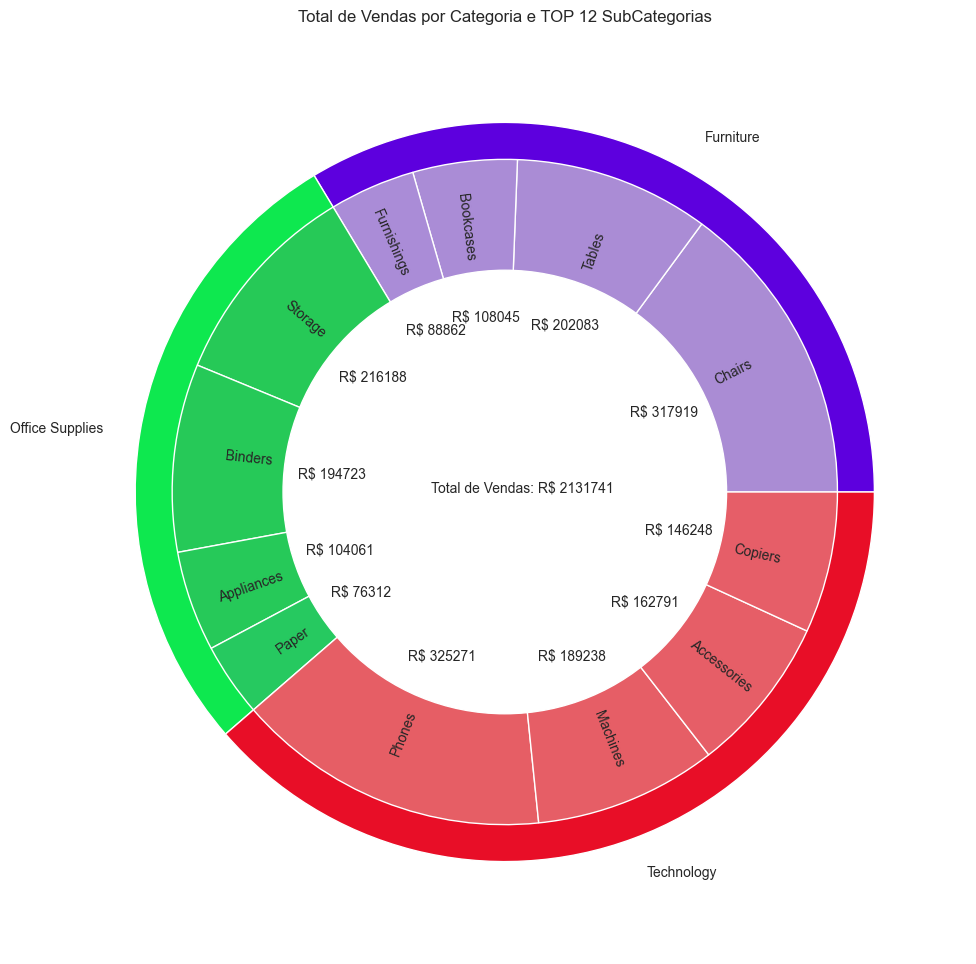

In [379]:
#Plot
#Tamanho da figura
fig, ax = plt.subplots(figsize= (18,12))

#Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda'],
            radius=1,
            labels=df_dsa_p10_cat['Categoria'],
            wedgeprops= dict(edgecolor='white'),
            colors=cores_categorias)

#Gráfico das subcategoria
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius=0.9,
            labels=df_dsa_p10['SubCategoria'],
            autopct=autopct_format(df_dsa_p10['Valor_Venda']),
            colors=cores_subcategorias,
            labeldistance=0.7,
            wedgeprops=dict(edgecolor='white'),
            pctdistance=0.53,
            rotatelabels=True)

#Limpa o centro do circulo
centre_circle = plt.Circle((0,0),0.6,fc='white')

#Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text='Total de Vendas: ' + 'R$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))),xy=(-0.2,0))
plt.title('Total de Vendas por Categoria e TOP 12 SubCategorias')
plt.show()
             

# Fim